In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [15]:
df = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/data/data_dis01.csv', encoding='cp949')
df

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,4,16.6,0,0.0
1,0,1,100,60,79,4,22.3,0,0.0
2,0,1,100,60,87,4,21.9,0,0.0
3,0,1,111,70,72,4,20.2,0,0.0
4,0,1,120,80,98,4,20.0,0,0.0
...,...,...,...,...,...,...,...,...,...
999995,1,27,120,70,81,2,23.1,1,0.0
999996,1,27,110,70,104,2,27.2,1,0.0
999997,1,27,115,53,110,1,25.2,1,1.0
999998,1,27,120,70,90,2,19.7,1,0.0


In [16]:
df.isnull().sum()

SEX               0
BTH_G             0
SBP               0
DBP               0
FBS               0
DIS               0
BMI               0
B_pressure        0
B_sugar       43114
dtype: int64

SEX : 0
BTH_G : 0
SBP : 0
DBP : 0
FBS : 0
DIS : 0
BMI : 0
B_pressure : 0
B_sugar : 43114


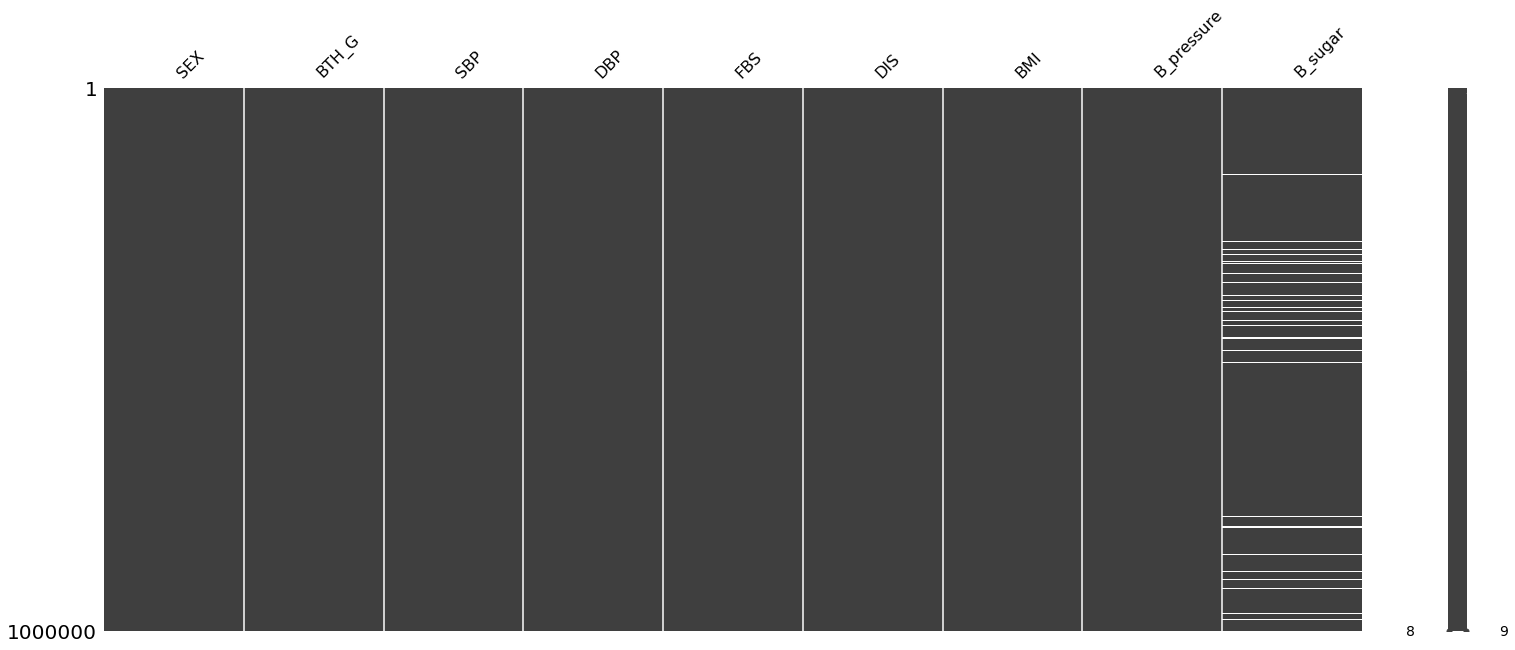

In [20]:
import missingno as msno

msno.matrix(df)
for c in df.columns:
    print('{} : {}'.format(c, len(df.loc[pd.isnull(df[c]), c].values)))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   SEX         1000000 non-null  int64  
 1   BTH_G       1000000 non-null  int64  
 2   SBP         1000000 non-null  int64  
 3   DBP         1000000 non-null  int64  
 4   FBS         1000000 non-null  int64  
 5   DIS         1000000 non-null  int64  
 6   BMI         1000000 non-null  float64
 7   B_pressure  1000000 non-null  int64  
 8   B_sugar     956886 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 68.7 MB


In [18]:
df = df.round(0).astype(int)

IntCastingNaNError: ignored

In [19]:
df_check=df.isnull()

print(df_check)

          SEX  BTH_G    SBP    DBP    FBS    DIS    BMI  B_pressure  B_sugar
0       False  False  False  False  False  False  False       False    False
1       False  False  False  False  False  False  False       False    False
2       False  False  False  False  False  False  False       False    False
3       False  False  False  False  False  False  False       False    False
4       False  False  False  False  False  False  False       False    False
...       ...    ...    ...    ...    ...    ...    ...         ...      ...
999995  False  False  False  False  False  False  False       False    False
999996  False  False  False  False  False  False  False       False    False
999997  False  False  False  False  False  False  False       False    False
999998  False  False  False  False  False  False  False       False    False
999999  False  False  False  False  False  False  False       False    False

[1000000 rows x 9 columns]


In [6]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))

In [7]:
co = pd.DataFrame(corr_df["B_pressure"].sort_values(ascending = False)) 
co.style.background_gradient(cmap='viridis')

,B_pressure
B_pressure,1.000000
BTH_G,0.490000
B_sugar,0.450000
FBS,0.330000
SBP,0.300000
DBP,0.190000
BMI,0.190000
SEX,0.000000
DIS,-0.940000


In [ ]:
co = pd.DataFrame(corr_df["수축기혈압"].sort_values(ascending = False)) 
co.style.background_gradient(cmap='viridis')

,수축기혈압
수축기혈압,1.000000
이완기혈압,0.740000
BMI,0.300000
연령,0.280000
공복혈당,0.190000
성별,-0.170000
질병,-0.310000


In [8]:
train=df

In [9]:
# feature와 target 분리
yt=np.array(train['B_pressure'])
xt=train.drop(['B_pressure'], axis=1)
xt=np.array(xt)

# 데이터 정규화
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

# train test 데이터 split
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

In [10]:
# 랜덤포레스트 without tuning
rf = RandomForestClassifier(random_state=17)
rf.fit(xtrain, ytrain)
forest_predictions = rf.predict(xtest)

accuracy_score(ytest, forest_predictions)
forest_predictions = rf.predict(xtest)

ValueError: ignored

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# 데이터 100만 개 사용

print(confusion_matrix(ytest, forest_predictions))

[[  3271   2793   1301   3471]
 [  1530  10915    506  19409]
 [  1743   1124   1758   3965]
 [  1382   9550   1285 135997]]


In [ ]:
print(classification_report(ytest, forest_predictions))

              precision    recall  f1-score   support

           1       0.41      0.30      0.35     10836
           2       0.45      0.34      0.38     32360
           3       0.36      0.20      0.26      8590
           4       0.84      0.92      0.87    148214

    accuracy                           0.76    200000
   macro avg       0.51      0.44      0.47    200000
weighted avg       0.73      0.76      0.74    200000



In [ ]:
print(classification_report(ytest, forest_predictions))
accuracy = accuracy_score(ytest, forest_predictions)
accuracy

              precision    recall  f1-score   support

           1       0.41      0.30      0.35     10836
           2       0.45      0.34      0.38     32360
           3       0.36      0.20      0.26      8590
           4       0.84      0.92      0.87    148214

    accuracy                           0.76    200000
   macro avg       0.51      0.44      0.47    200000
weighted avg       0.73      0.76      0.74    200000



0.759705